<a href="https://colab.research.google.com/github/wjdavenport/computer-science/blob/master/peso_of_canada_v03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

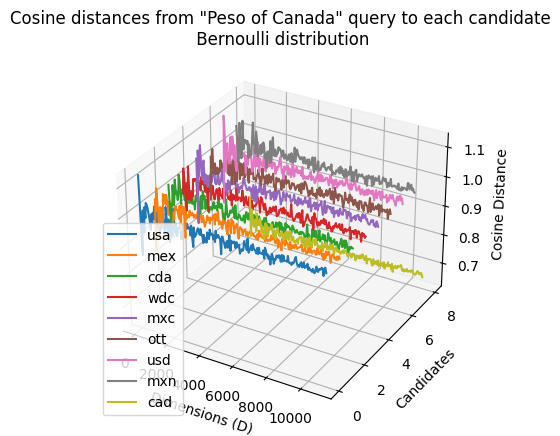

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 2023-06-24 v02
# authors:  Frithjof Gressman, Jeptha Davenport

# Comment/Uncomment to choose distributions ###
#
# Normal distribution
# def generate_base():
#   return np.random.normal(size=[1, D])
#
# Bernoulli distribution
def generate_base():
  global D
  # p is the probability of getting 1
  p = 0.5
  return np.random.choice([-1,1], size=[1,D], p=[1-p, p])
#
#
###

# Create a figure for 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# dimensions to explore
D_values = range(100, 11000, 50)

# dictionary to store results
results = {}

# Loop over different dimensions
for D in D_values:

  # define the key seed vectors
  country = generate_base()
  capital = generate_base()
  currency = generate_base()

  # define categories
  usa, mex = generate_base(), generate_base()  # USA vs Mexico
  wdc, mxc = generate_base(), generate_base()  # Washington DC vs Mexico City
  usd, mxn = generate_base(), generate_base()  # US dollar vs Peso
  usa, cda = generate_base(), generate_base()  # USA vs Canada
  wdc, ott = generate_base(), generate_base()  # Washington vs Ottawa
  usd, cad = generate_base(), generate_base()  # US dollar vs Canadian dollar

  # create embeddings
  us = country * usa + capital * wdc + currency * usd
  mx = country * mex + capital * mxc + currency * mxn
  cd = country * cda + capital * ott + currency * cad

  # store candidates and their distances
  candidates = []
  distances = []

  # query: what is the peso of Canada?
  pes_of_can = (mx * cd) * mxn
  # (note use of cd as its own inverse, which works for XOR but not necessarily
  #   for other operations)

  # find the vector closest to query
  closest = None
  for candidate in ["usa", "mex", "cda", "wdc", "mxc", "ott", "usd", "mxn", "cad"]:
      # compute norm
      distance = 1 - cosine_similarity(pes_of_can, locals()[candidate])
      # store candidate and distance
      candidates.append(candidate)
      distances.append(distance[0][0])
      # is it closer than current best?
      if closest is None or distance < closest[1]:
          # yes, so make it the closest
          closest = (candidate, distance)

  # check to see that peso of Canada is indeed cad
  if closest[0] != "cad":
    print(f"Unexpected result {closest[0]} found at D={D}")

  for i, candidate in enumerate(candidates):
    if candidate not in results:
      results[candidate] = []
    results[candidate].append(distances[i])


# plot distances over varying D
for i, candidate in enumerate(results.keys()):
  ax.plot(D_values, [i]*len(D_values), results[candidate], label=candidate)

ax.set_xlabel('Dimensions (D)')
ax.set_ylabel('Candidates')
ax.set_zlabel('Cosine Distance')
plt.title('Cosine distances from "Peso of Canada" query to each candidate\n Bernoulli distribution')
ax.legend()
plt.show()